C:\Users\Geronimo\Anaconda3\lib\site-packages\skimage\util\arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


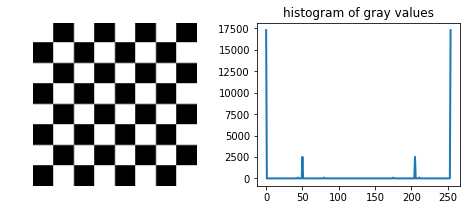

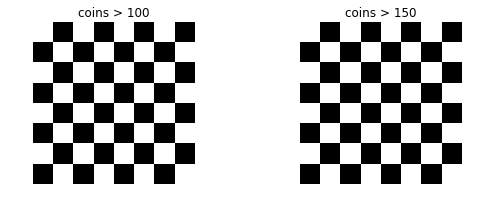

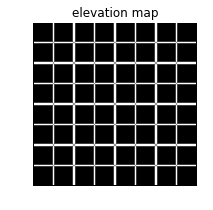

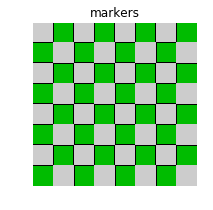

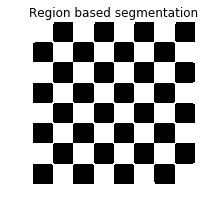

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data

#Loading Data

coins = data.checkerboard()

#Creating Histogram

hist = np.histogram(coins, bins=np.arange(0, 256))

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(coins, cmap=plt.cm.gray, interpolation='nearest')
axes[0].axis('off')
axes[1].plot(hist[1][:-1], hist[0], lw=2)
axes[1].set_title('histogram of gray values')

#A simple way to segment the coins is to choose a threshold based on the histogram of gray values.

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

axes[0].imshow(coins > 100, cmap=plt.cm.gray, interpolation='nearest')
axes[0].set_title('coins > 100')

axes[1].imshow(coins > 150, cmap=plt.cm.gray, interpolation='nearest')
axes[1].set_title('coins > 150')

for a in axes:
    a.axis('off')

plt.tight_layout()

#We therefore try a region-based method using the watershed transform. 
#First, we find an elevation map using the Sobel gradient of the image.

from skimage.filters import sobel

#Creating Elevation Map

elevation_map = sobel(coins)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('elevation map')
ax.axis('off')

#we find markers of the background and the coins based on the extreme parts of the histogram of gray values.

markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax.set_title('markers')
ax.axis('off')

#we use the watershed transform to fill regions of the elevation map starting from the markers determined above.

from skimage import morphology
segmentation = morphology.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('Region based segmentation')
ax.axis('off')

plt.tight_layout()

plt.show()

